<h2 style= 'text-align: center; text-size:150px; background-color: blue; border:60px; color:white'> Demand Forecasting For Inventory Management

<table align="left">
        </td>
        <td>
            <div align="left", style="font-size:120%",font-style : "italic">
                    <b>An automobile company which has product Brake liner and receive order from different geographies. Orders are classified as domestic and international, majority of orders are international. 
Company has limited inventory space and every month order quantities are different.
Raw materal and semi finished goods stored in inventory for production. Every month production planning and control is done for orders because whole production cycle is time taking and production tools and machinaries are limited.
Now because of every month changing order and production monthly lot system it is difficult to maintain appropriate inventory because of limited space. For example: One month order comes in bulk, for another month it is very less. Sometimes production capacity become constariant and sometime inventory fall short. As a result four problem occurs: <br><br>
                        1) On time orders fullfillment failure <br>
                        2) No proper inventory management or space utlization<br>
                        3) Ineffective utilization of machinary for production <br> 
                        4) Ineffective planning in Material requirements planning(MRP)- SAP ERP.<br> 
                        <br>
                                I am trying to solve this business problem by using time series based on historic data of orders and trying to predict the upcoming orders so that we can have proper Inventory and space management, achive on time deliveries and minimise the tool change over on machinaries.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Content :

1. **[Import Packages](#import_packages)**
2. **[Load Data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
    
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<a id='load_data'></a>
# 2. Load Data

In [2]:
quantity = pd.read_csv("Order_forecast_per_month.csv")
quantity.head()

,date,sales
0,2011-01,148
1,2011-02,136
2,2011-03,119
3,2011-04,104
4,2011-05,118


In [3]:
quantity.tail()

,date,sales
120,2021-01,396
121,2021-02,420
122,2021-03,472
123,2021-04,548
124,2021-05,461


<a id='data_preparation'></a>
# 3. Data Preparation

### Here we will analyze and prepare data to perform regression techniques:<br>
1. Check dimensions and data types of the dataframe <br>
2. Study summary statistics<br> 
3. Converting date into standard format<br> 
4. Check for missing values<br>
5. Study correlation<br>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [4]:
quantity.shape

(125, 2)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [5]:
quantity.describe()

,sales
count,125.000000
mean,243.656000
std,89.277395
min,104.000000
25%,183.000000
50%,229.000000
75%,272.000000
max,548.000000


<a id='check_data_type'></a>
## 3.3 Checking for Missing Values 

In [6]:
# summary of the data 
quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    125 non-null    object
 1   sales   125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [7]:
# Checking the stock time stamp
quantity['date'].min(), quantity['date'].max()

('2011-01', '2021-05')

In [8]:
# We sort the columns as well as check missing values
quantity = quantity.sort_values('date')

In [9]:
# Checking for null values
quantity.isnull().sum()

date     0
sales    0
dtype: int64

In [10]:
# There are no missing values

<a id='Indexing_with_Date'></a>
## 3.5 Indexing with Date

In [11]:
quantity['date'] = pd.to_datetime(quantity['date'])

In [12]:
quantity = quantity.set_index('date')

In [13]:
quantity.head()

,sales
date,
2011-01-01,148
2011-02-01,136
2011-03-01,119
2011-04-01,104
2011-05-01,118


<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

Now we analysis Time series data
1. Visualizing Data <br>
2. Sampling<br>
3. Checking Stationarity <br>
4. Decomposing<br>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

<AxesSubplot:xlabel='date'>

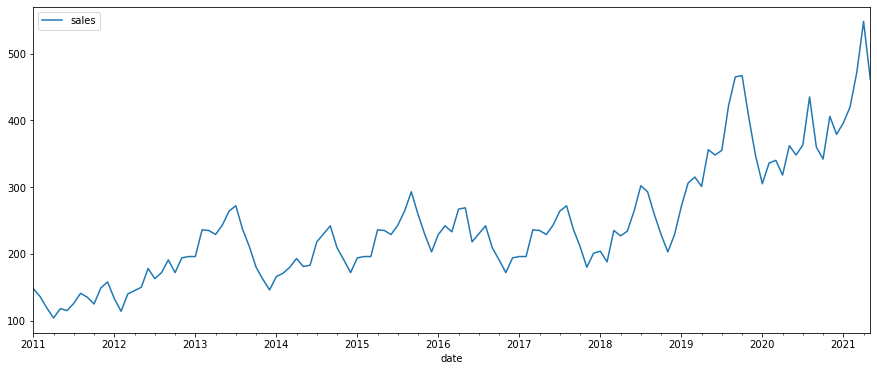

In [14]:
quantity.plot(figsize = (15,6))

<a id='Sampling'></a>
## 4.2 Sampling

In [20]:
y = quantity['sales'].resample('MS').mean()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

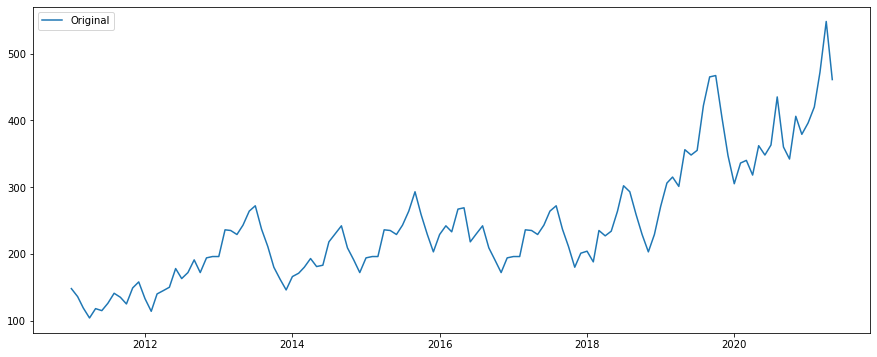

In [22]:
# Figure for Original Data
plt.figure(figsize = (15,6))
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

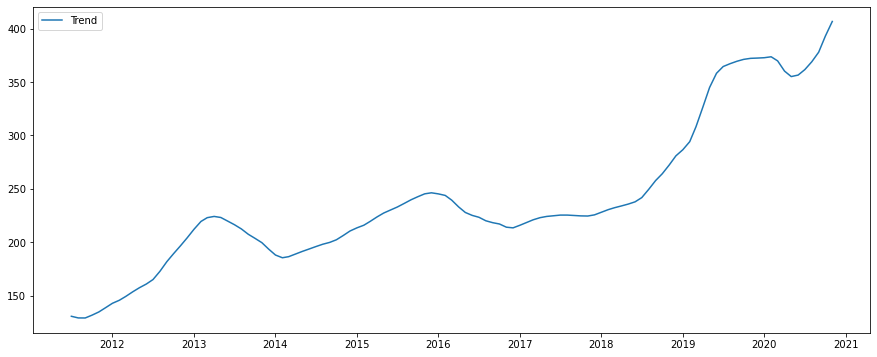

In [23]:
# Figure For Trend
trend = decomposition.trend
plt.figure(figsize = (15,6))
plt.plot(trend, label = "Trend")
plt.legend(loc = 'best')

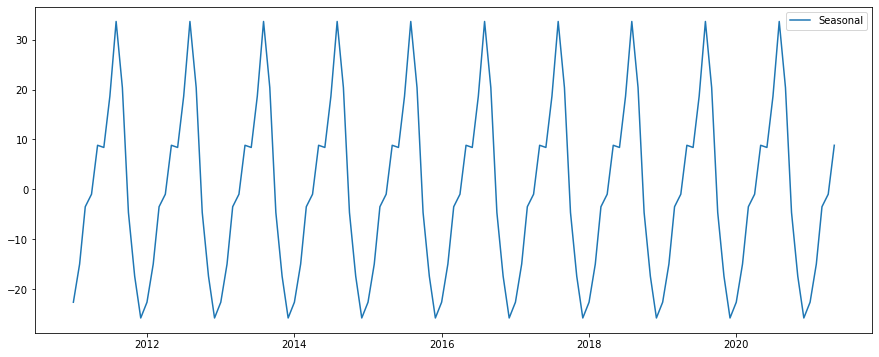

In [24]:
# Figure For Seasonal Data
seasonal = decomposition.seasonal
plt.figure(figsize = (15,6))
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = 'best')

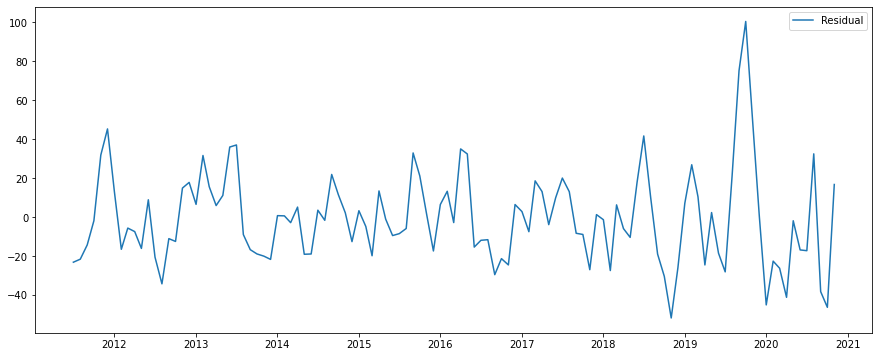

In [25]:
# Figure for Residual Data
residual = decomposition.resid
plt.figure(figsize = (15,6))
plt.plot(residual, label = "Residual")
plt.legend(loc = 'best')

**Report:** <br>

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity

Stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time. 

Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

In [26]:
from statsmodels.tsa.stattools import adfuller

**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [27]:
## to check whether the data is stationary or not

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics {}".format(np.round(result[0],4)))
    print("P Value {}".format(np.round(result[1],4)))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")

In [28]:
adf_test(y)

ADF Statistics -0.2553
P Value 0.9316
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


<a id='Stationarize the Time Series using Differencingy'></a>
## 4.3.1 Stationarize the Time Series using Differencing

In [30]:
# Apply log and shift differencing for Stationarize the data

y_log = np.log(y)
y_log_diff_1 = y_log - y_log.shift()

In [31]:
# Check by Adfuller test with drop the nan values

adf_test(y_log_diff_1.dropna())

ADF Statistics -7.0811
P Value 0.0
Strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

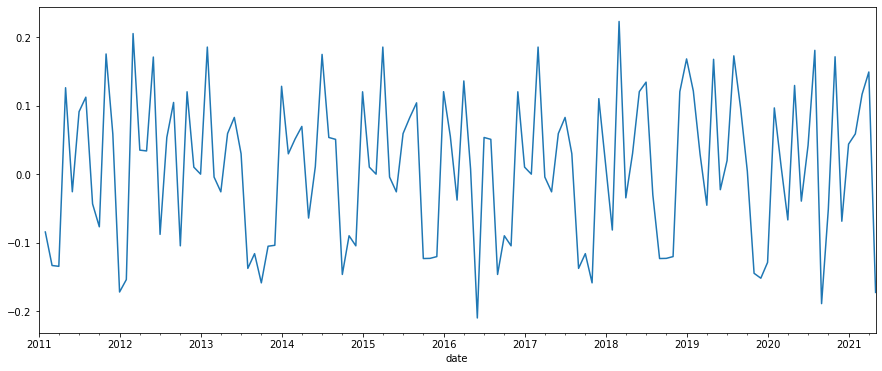

In [32]:
# Plot the graph

y_log_diff_1.plot(figsize = (15,6))

<a id='Decomposing'></a>
## 4.4 Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

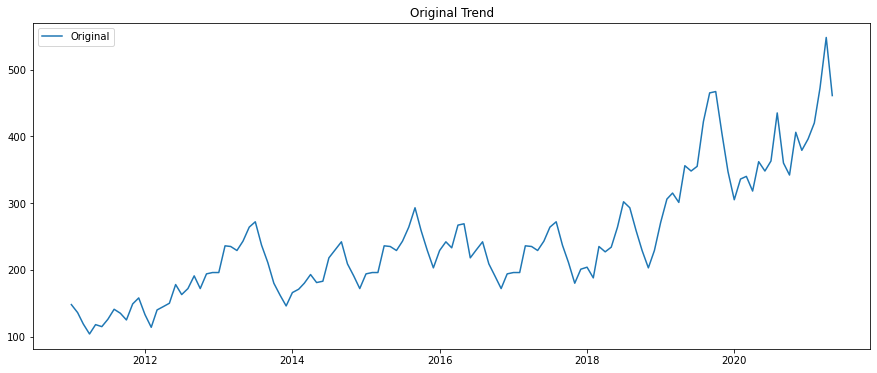

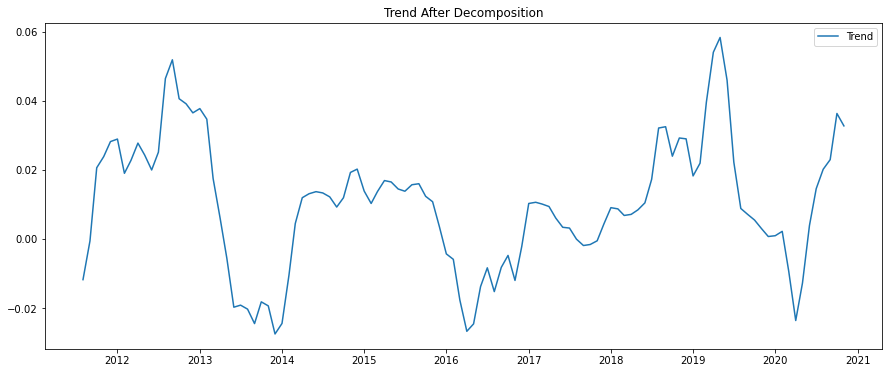

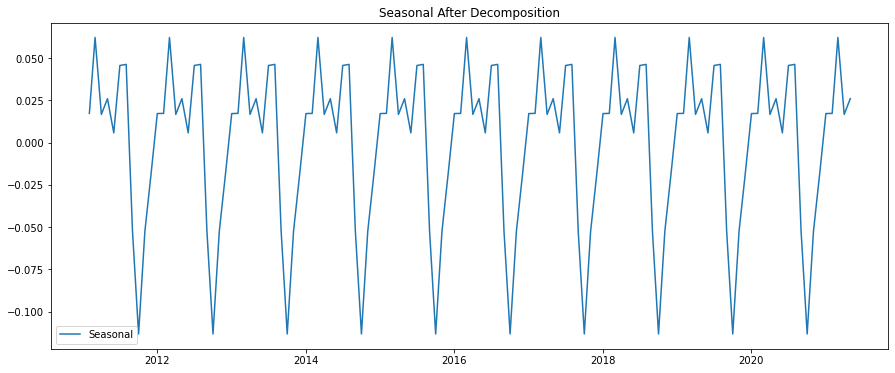

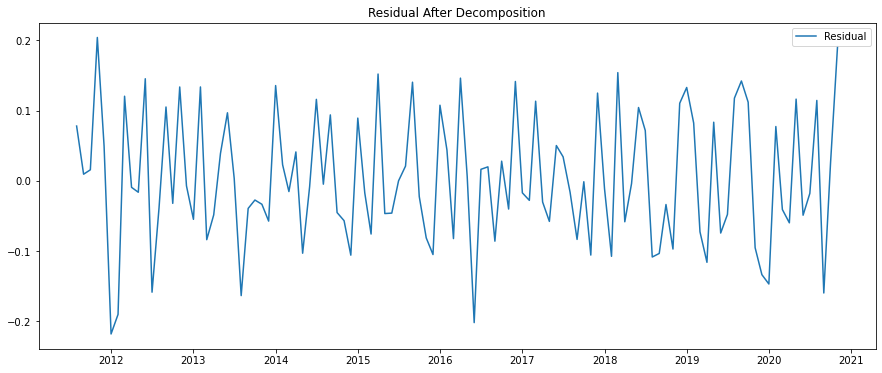

In [33]:
y_log_diff_1.dropna(inplace=True)
decomposition = seasonal_decompose(y_log_diff_1)
plt.figure(figsize = (15,6))
plt.title("Original Trend")
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend = decomposition.trend
plt.show()
plt.figure(figsize = (15,6))
plt.title("Trend After Decomposition")
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.figure(figsize = (15,6))
plt.title("Seasonal After Decomposition")
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.figure(figsize = (15,6))
plt.title("Residual After Decomposition")
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

**By visualizing the decomposed components of the original time series we can say that the quantity is unstable, along with its obvious seasonality.**

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

**We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data**<br>

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

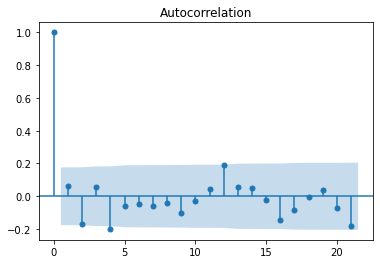

In [35]:
acf = plot_acf(y_log_diff_1.dropna())

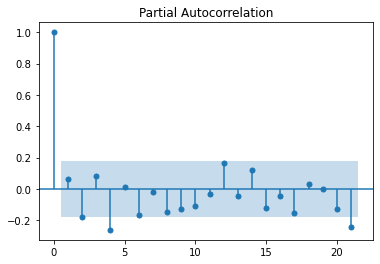

In [36]:
pacf = plot_pacf(y_log_diff_1.dropna())

ARIMA for Sesional data is used for seasonal data

In [40]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [41]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1733.020994362846
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1475.5896888585828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1265.9704309726546


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1138.673268049265
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1262.0124573832281


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1216.2397877743751
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1149.566661844011


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1139.7312689916644
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1563.6298248870821


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1323.842036143141
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1140.6734828154435


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1021.0130036189737


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1153.9572225970892


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1112.167539596408


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1045.9982627136621


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1023.0125339807275
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1177.4576356450295
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1071.4321353395117
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1115.6131180124846


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_mon

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:967.1889453296586
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1080.3994441506343
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1073.3680028775073


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1000.534612440366


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:969.1817561161653
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1169.899433913244


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1063.1185600485278
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1105.5621051150872


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:959.7547650906467
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1081.9925509534442


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1065.1185209290518
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1002.3553804007029


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:961.6415490675374
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1187.8934682777817


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1082.2897932813285
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1119.3792846704905


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:979.9824438332566
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1082.2473003370646


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1093.8706440337196
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:997.2155242086587


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:981.981848679639
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1180.689743980318


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1074.4611862999895
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1100.3882956876807


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:970.1855245263841


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1083.9523590427748


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1086.6272076067614


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:995.1568017164701


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:972.1810037901301
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1179.039307040778
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1073.13510694317
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1116.9020334997106


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_mon

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:968.9136850220457
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1073.2057501841057


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1075.0943886738078
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:990.9941372739921


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:970.7987832257168
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1160.1780947393102


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1054.2433426538921
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1090.9945455764368


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:953.7180573137767


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1063.8205743404103


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1056.2380059997436


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:981.4198601938843


C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:955.7179090432061


In [42]:
results.aic.min()

955.7179090432061

<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the Seasonal ARIMA  model

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12))

results = mod.fit()
print(results.summary().tables[1])

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6038      0.148     -4.090      0.000      -0.893      -0.314
ma.L1          0.9008      0.107      8.383      0.000       0.690       1.111
ar.S.L12       0.1365      0.164      0.831      0.406      -0.185       0.458
ma.S.L12      -0.9859      1.807     -0.546      0.585      -4.527       2.555
sigma2       707.8869   1231.080      0.575      0.565   -1704.986    3120.760


**Running model diagnostiscs to check any unusual behaviour**

<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


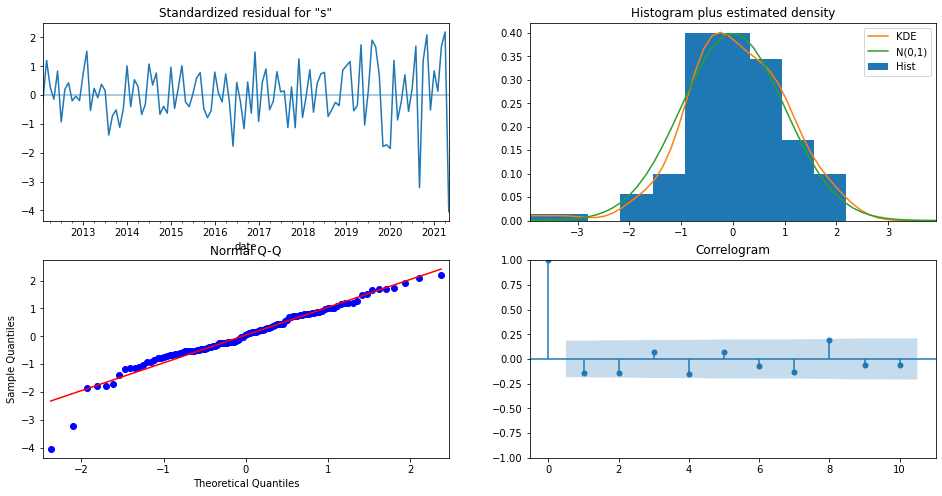

In [44]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**The model diagnostics indicates that the model residuals are near normally distributed.**

<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

**We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts**

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


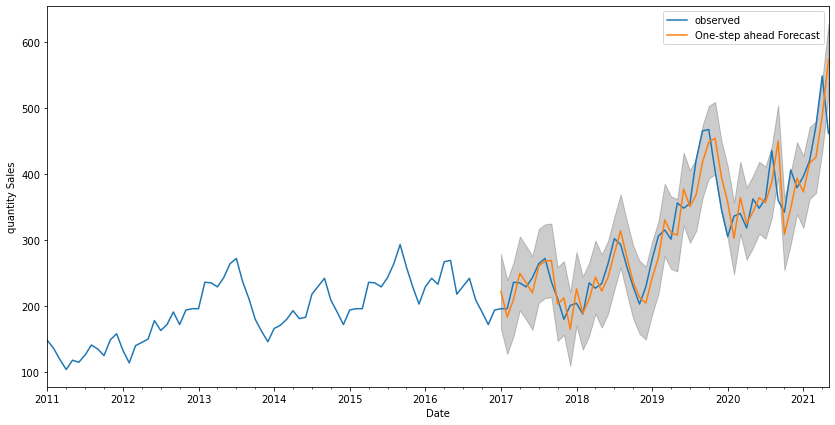

In [91]:
#Set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')

ax.set_ylabel('quantity Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE

In [96]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1214.16
The Root Mean Squared Error of our forecasts is 34.84


<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 

            lower sales  upper sales
2021-06-01   367.695181   476.235003
2021-07-01   370.651125   548.345897
2021-08-01   363.551480   578.692148
2021-09-01   332.732879   585.662547
2021-10-01   292.004366   574.552796
2021-11-01   282.550517   593.644940
2021-12-01   259.041132   595.305554
2022-01-01   255.356448   615.554707
2022-02-01   255.013355   637.191141
2022-03-01   264.700125   667.839928
2022-04-01   273.471868   696.433573
2022-05-01   253.998555   695.952246
2022-06-01   233.264336   700.819727


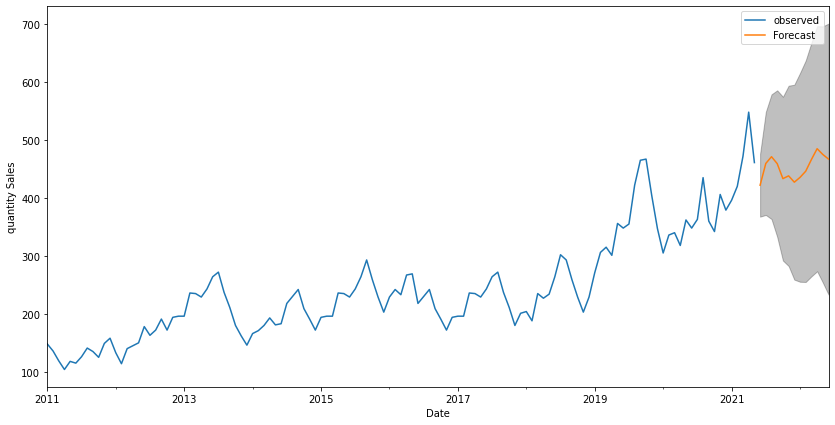

In [94]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('quantity Sales')
print(pred_ci)
plt.legend()
plt.show()

<a id="Visualizing_the_Forecast"> </a>
## 5.6 Demand/ orders Forecasting 

In [100]:
pred_uc.predicted_mean

2021-06-01    421.965092
2021-07-01    459.498511
2021-08-01    471.121814
2021-09-01    459.197713
2021-10-01    433.278581
2021-11-01    438.097729
2021-12-01    427.173343
2022-01-01    435.455577
2022-02-01    446.102248
2022-03-01    466.270026
2022-04-01    484.952721
2022-05-01    474.975400
2022-06-01    467.042031
Freq: MS, Name: predicted_mean, dtype: float64

<a id="Conclusion"> </a>
# Conclusion

**We observe that production quantity produces seasonal pattern. The production quantity increases linearly over time and prediction mean used as tentative order for upcoming month for production planning and control.**

## Thank You
#### Pravas